IMPORTING ALL THE NECESSARY LIBRARIES


In [ ]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_csv('BTC-USD.csv')

In [ ]:
df.shape

(2739, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2.739000e+03
mean,11579.840857,11890.676356,11237.156996,11592.909201,11592.909201,1.481059e+10
std,16264.450691,16700.176200,15763.591964,16268.661996,16268.661996,1.996227e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,608.433014,611.139496,605.633515,608.472992,608.472992,8.108420e+07
50%,6357.009766,6480.589844,6265.089844,6361.259766,6361.259766,5.191060e+09
75%,10672.950195,10936.127930,10361.856935,10685.619140,10685.619140,2.490200e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.510000e+11


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2734,2022-03-13,38884.72656,39209.35156,37728.14453,37849.66406,37849.66406,1.730075e+10
2735,2022-03-14,37846.31641,39742.50000,37680.73438,39666.75391,39666.75391,2.432216e+10
2736,2022-03-15,39664.25000,39794.62891,38310.21094,39338.78516,39338.78516,2.393400e+10
2737,2022-03-16,39335.57031,41465.45313,39022.34766,41143.92969,41143.92969,3.961692e+10
2738,2022-03-17,41140.84375,41287.53516,40662.87109,40951.37891,40951.37891,2.200960e+10


# Date range for dataset

In [ ]:
sd=df.iloc[0][0]
ed=df.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2014-09-17
Ending Date 2022-03-17


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
maindf = df[['Date','Close']]
maindf.shape

(2739, 2)

Whole period of timeframe of bitcoin close price 


In [ ]:
fig = px.line(maindf, x=maindf.Date, y=maindf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=1, opacity=0.8, marker_line_color='green')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

SELECT THE RANGE FOR THE MODEL TO TRAIN ON

In [ ]:
maindf = maindf[maindf['Date'] > '2021-03-17']
close_stock = maindf.copy()
print("Total data for prediction: ",maindf.shape[0])

Total data for prediction:  365


In [ ]:
maindf

,Date,Close
2374,2021-03-18,57858.92188
2375,2021-03-19,58346.65234
2376,2021-03-20,58313.64453
2377,2021-03-21,57523.42188
2378,2021-03-22,54529.14453
...,...,...
2734,2022-03-13,37849.66406
2735,2022-03-14,39666.75391
2736,2022-03-15,39338.78516
2737,2022-03-16,41143.92969


In [ ]:
fig = px.line(maindf, x=maindf.Date, y=maindf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
del maindf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
maindf=scaler.fit_transform(np.array(maindf).reshape(-1,1))
print(maindf.shape)

(365, 1)


In [ ]:
maindf

array([[0.74290149],
       [0.75581826],
       [0.7549441 ],
       [0.7340163 ],
       [0.65471761],
       [0.66027385],
       [0.60824243],
       [0.57990238],
       [0.67082398],
       [0.69296939],
       [0.69236648],
       [0.74002214],
       [0.77094132],
       [0.77097153],
       [0.77565847],
       [0.78329904],
       [0.73614739],
       [0.76672684],
       [0.77465396],
       [0.75173205],
       [0.69496692],
       [0.7552171 ],
       [0.75312626],
       [0.79412869],
       [0.80503272],
       [0.79678282],
       [0.89238806],
       [0.8819599 ],
       [0.8873709 ],
       [0.84125737],
       [0.81771445],
       [0.69939617],
       [0.6863685 ],
       [0.70619837],
       [0.638217  ],
       [0.58144142],
       [0.56373405],
       [0.53611753],
       [0.50839964],
       [0.64128018],
       [0.66806453],
       [0.66254501],
       [0.62892183],
       [0.74002152],
       [0.74208392],
       [0.71038399],
       [0.72545874],
       [0.623

Train - Test Split


In [ ]:
training_size=int(len(maindf)*0.70)
test_size=len(maindf)-training_size
train_data,test_data=maindf[0:training_size,:],maindf[training_size:len(maindf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (255, 1)
test_data:  (110, 1)


In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (249, 5)
y_train:  (249,)
X_test:  (104, 5)
y_test (104,)


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (249, 5, 1)
X_test:  (104, 5, 1)


In [ ]:
X_train

array([[[0.74290149],
        [0.75581826],
        [0.7549441 ],
        [0.7340163 ],
        [0.65471761]],

       [[0.75581826],
        [0.7549441 ],
        [0.7340163 ],
        [0.65471761],
        [0.66027385]],

       [[0.7549441 ],
        [0.7340163 ],
        [0.65471761],
        [0.66027385],
        [0.60824243]],

       ...,

       [[0.74980456],
        [0.79158525],
        [0.76598323],
        [0.70133225],
        [0.73522533]],

       [[0.79158525],
        [0.76598323],
        [0.70133225],
        [0.73522533],
        [0.70109752]],

       [[0.76598323],
        [0.70133225],
        [0.73522533],
        [0.70109752],
        [0.72742876]]])

# **Create the Model**:

---



---



In [ ]:
model = Sequential() 
model.add(LSTM(units = 128, activation = 'relu', return_sequences = True, input_shape = (None,1)))
model.add(Dropout(0.2))  
model.add(LSTM(units = 128, activation = 'relu'))
model.add(Dropout(0.2)) 
model.add(Dense(units =1))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, None, 128)         66560     
                                                                 
 dropout_6 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# from keras import backend as K
# K.set_value(model.optimizer.learning_rate, 0.08)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
4/4 [==============================] - 3s 149ms/step - loss: 0.2623 - val_loss: 0.0852
Epoch 2/200
4/4 [==============================] - 0s 34ms/step - loss: 0.1817 - val_loss: 0.0396
Epoch 3/200
4/4 [==============================] - 0s 34ms/step - loss: 0.0926 - val_loss: 0.0063
Epoch 4/200
4/4 [==============================] - 0s 37ms/step - loss: 0.0242 - val_loss: 0.0398
Epoch 5/200
4/4 [==============================] - 0s 35ms/step - loss: 0.0417 - val_loss: 0.0424
Epoch 6/200
4/4 [==============================] - 0s 34ms/step - loss: 0.0279 - val_loss: 0.0117
Epoch 7/200
4/4 [==============================] - 0s 35ms/step - loss: 0.0187 - val_loss: 0.0051
Epoch 8/200
4/4 [==============================] - 0s 35ms/step - loss: 0.0234 - val_loss: 0.0047
Epoch 9/200
4/4 [==============================] - 0s 33ms/step - loss: 0.0188 - val_loss: 0.0060
Epoch 10/200
4/4 [==============================] - 0s 35ms/step - loss: 0.0131 - val_loss: 0.0104
Epoch 11/200
4/4 [

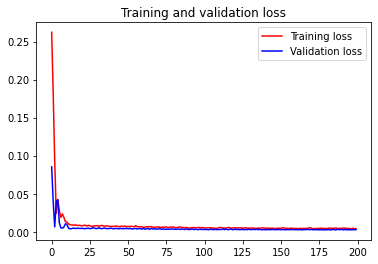

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

((249, 1), (104, 1))

In [ ]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

## Measuring model error values

In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,train_predict)))
print("Train data MSE: ", mean_squared_error(y_train,train_predict))
print("Train data MAE: ", mean_absolute_error(y_train,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))

Train data RMSE:  0.05282647128381842
Train data MSE:  0.002790636068300092
Train data MAE:  0.041634816465697576
-------------------------------------------------------------------------------------
Test data RMSE:  0.05215621678350104
Test data MSE:  0.0027202709491675556
Test data MAE:  0.03934112249744544


In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(y_train, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(y_test, test_predict))

Train data explained variance regression score: 0.9622374089749074
Test data explained variance regression score: 0.8134563788174141


In [ ]:
print("Train data R2 score:", r2_score(y_train, train_predict))
print("Test data R2 score:", r2_score(y_test, test_predict))

Train data R2 score: 0.962167186264859
Test data R2 score: 0.8027540032696298


In [ ]:

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0018782654840704776
Test data MGD:  0.0020487115222421705
----------------------------------------------------------------------
Train data MPD:  84.77657345352624
Test data MPD:  88.56603397592545


In [ ]:

look_back=time_step
trainPredictPlot = np.empty_like(maindf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(maindf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(maindf)-1, :] = test_predict

print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 7
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  7


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[1 2 3 4 5]
[ 6  7  8  9 10 11 12]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(maindf[len(maindf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last days close price','Predicted next days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last vs next days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmdf=maindf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()